<a href="https://colab.research.google.com/github/Chirag099/EcommerceWebsite/blob/main/EcommerceDataSet__LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Dataset

In [ ]:
cust_data = pd.read_csv("Ecommerce Customers")

The csv has Customer Info, such as Email Addresss and color under the section Avatar.

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App

Time on Website: Average time spent on Website.

Length of Membership: Number of years customer has been a member

In [ ]:
cust_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
cust_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
cust_data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

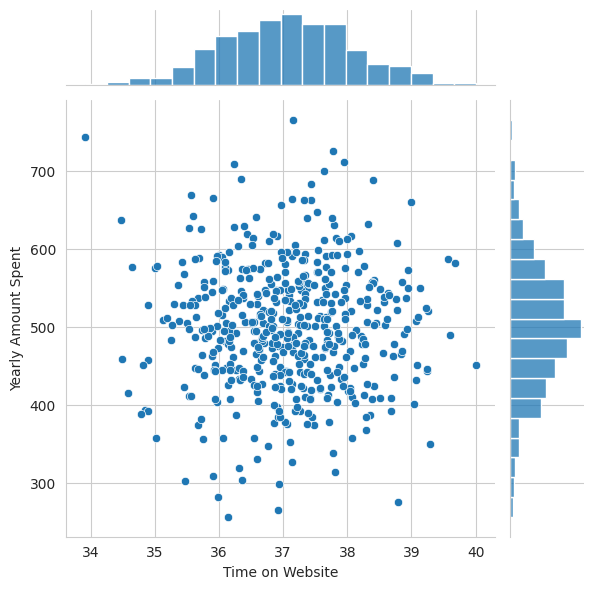

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(data=cust_data,x="Time on Website",y="Yearly Amount Spent")

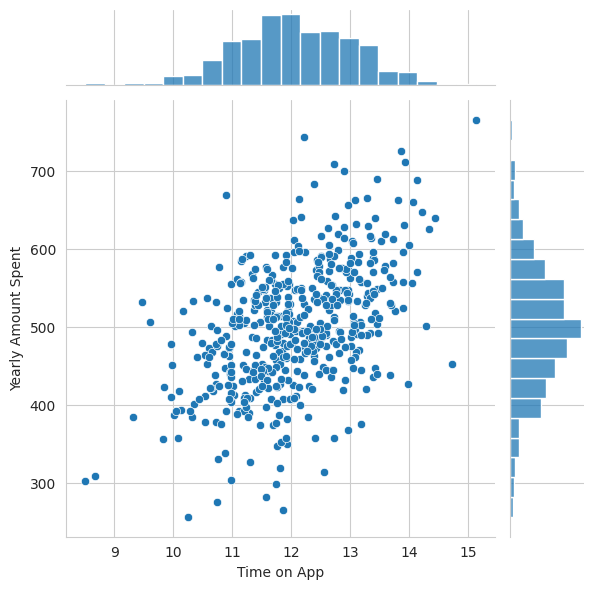

In [ ]:
sns.jointplot(data=cust_data,x="Time on App",y="Yearly Amount Spent")

<ipython-input-15-46028e28e6c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cust_data.corr(),cmap='GnBu',annot=True)


<Axes: >

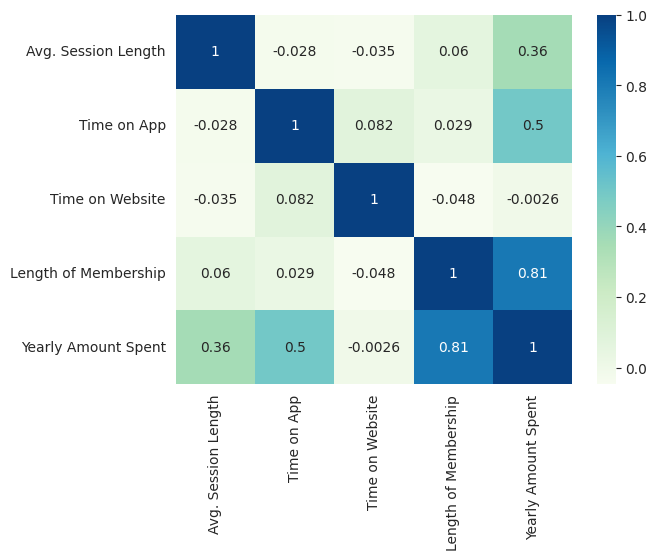

In [ ]:
sns.heatmap(cust_data.corr(),cmap='GnBu',annot=True)

Between the App and the website, the correlation with the yearly amount spent is much higher in the case of App at 0.5 as compared to the website which is -0.0026.

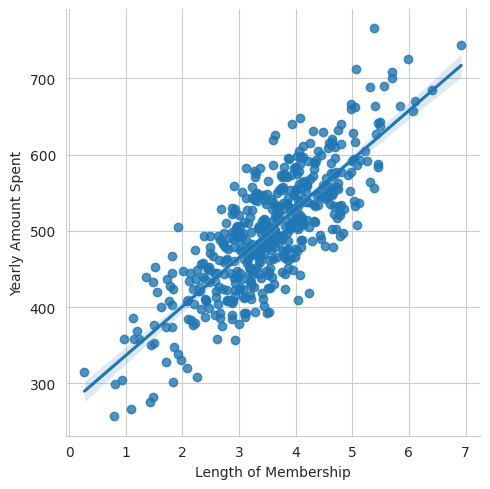

In [ ]:
sns.lmplot(data=cust_data,x="Length of Membership",y="Yearly Amount Spent")

In [ ]:
cust_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Splitting the data

In [ ]:
X = cust_data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = cust_data ['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

Model Predictions

In [ ]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y values')

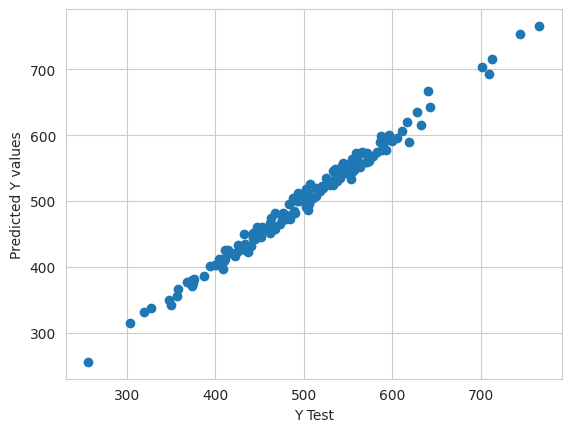

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y values')

Conclusions

In [ ]:
cust_coef_df = pd.DataFrame(linear_model.coef_,index=X.columns,columns=['Coefficient'])

In [ ]:
cust_coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the Coefficients:

A 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

A 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

A 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

A 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

Conclusion:
Upon analyzing the data, it becomes evident that an increase in the time spent on the mobile app correlates with higher customer spending. Faced with this observation, the company confronts a decision: whether to exclusively concentrate efforts on enhancing the mobile app or to address the underperformance of the website. Moreover, there is an opportunity for the company to implement strategies that extend the duration of existing customers' memberships.